In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Here, we import our training csv dataset.  
cttrain = pd.read_csv('C:/Users/Jeff/Documents/train.csv')
tgender = pd.read_csv('C:/Users/Jeff/Documents/gender_submission.csv')
pd.set_option('display.max_columns', 200)

In [3]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


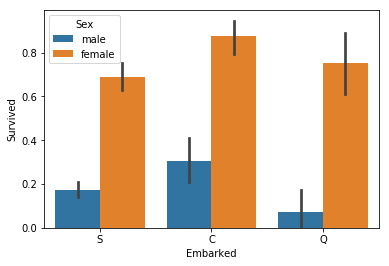

In [4]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=ttrain)

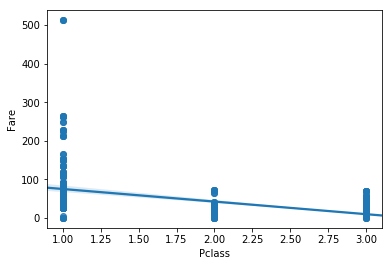

In [5]:
# This is a regression plot of class type against titanic ticket fair. There is a correlation between them.
sns.regplot("Pclass","Fare",data=ttrain)

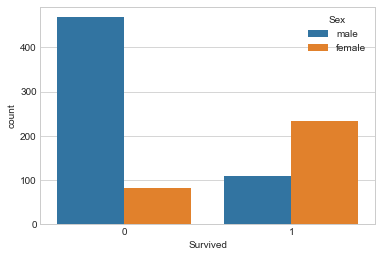

In [6]:
# Here, we see how many males sruvived compared to women
sns.set_style('whitegrid')
sns.countplot("Survived",hue='Sex',data=ttrain)

In [7]:
ttrain.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
#This is for categorizing the Age, so we don't overfit data
ttrain.Age.fillna(-1)
bins = [-1, 0, 5, 12, 18, 25, 35, 60, 100]
names = ['unknown','Newborn','Child','Preteen','Teenager','Young Adult','Adult','Elder']
categories = pd.cut(ttrain.Age,bins,labels = names)
ttrain.Age = categories
ttrain.Age.fillna('unknown')
#Test
ttest.Age.fillna(-1)
bins = [-1, 0, 5, 12, 18, 25, 35, 60, 100]
names = ['unknown','Newborn','Child','Preteen','Teenager','Young Adult','Adult','Elder']
categories = pd.cut(ttest.Age,bins,labels = names)
ttest.Age = categories
ttest.Age = ttest.Age.fillna('unknown')

In [9]:
ttrain.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
# This is for categorizing the Fare, so we don't overfit data
ttrain.Fare.fillna(-1)
bins = [-1, 0, 10, 20, 40, 1000]
names = ['unknown','cheap','low mid','high mid','expensive']
categories = pd.cut(ttrain.Fare,bins,labels=names)
ttrain.Fare = categories

# This is for categorizing the Fare, so we don't overfit data
ttest.Fare.fillna(-1)
bins = [-1, 0, 10, 20, 40, 1000]
names = ['unknown','cheap','low mid','high mid','expensive']
categories = pd.cut(ttest.Fare,bins,labels=names)
ttest.Fare = categories

In [11]:
categories

0          cheap
1          cheap
2          cheap
3          cheap
4        low mid
5          cheap
6          cheap
7       high mid
8          cheap
9       high mid
10         cheap
11      high mid
12     expensive
13      high mid
14     expensive
15      high mid
16       low mid
17         cheap
18         cheap
19         cheap
20     expensive
21         cheap
22      high mid
23     expensive
24     expensive
25       low mid
26     expensive
27         cheap
28      high mid
29      high mid
         ...    
388        cheap
389     high mid
390    expensive
391     high mid
392     high mid
393      low mid
394     high mid
395    expensive
396        cheap
397    expensive
398        cheap
399        cheap
400    expensive
401     high mid
402    expensive
403    expensive
404     high mid
405      low mid
406      low mid
407    expensive
408        cheap
409      low mid
410        cheap
411    expensive
412        cheap
413        cheap
414    expensive
415        che

In [12]:
#this is slicing the Cabin names so we just see the first letter
ttrain.Cabin.fillna('N')
ttrain.Cabin = ttrain.Cabin.apply(lambda x: str(x)[0])
#Test data
ttest.Cabin.fillna('N')
ttest.Cabin = ttest.Cabin.apply(lambda x: str(x)[0])

In [13]:
ttrain.head(400)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Teenager,1,0,A/5 21171,cheap,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,expensive,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,cheap,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,expensive,C,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,cheap,n,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,cheap,n,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,expensive,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Newborn,3,1,349909,high mid,n,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,low mid,n,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Preteen,1,0,237736,high mid,n,C


In [14]:
ttrain = ttrain.drop(ttrain.columns[[3, 8, 11]], axis=1)
ttrain.head()
#Just dropping some redundant columns

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,Teenager,1,0,cheap,n
1,2,1,1,female,Adult,1,0,expensive,C
2,3,1,3,female,Young Adult,0,0,cheap,n
3,4,1,1,female,Young Adult,1,0,expensive,C
4,5,0,3,male,Young Adult,0,0,cheap,n


In [15]:

ttest = ttest.drop(ttest.columns[[2,7,10]], axis=1)
ttest.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,male,Young Adult,0,0,cheap,n
1,893,3,female,Adult,1,0,cheap,n
2,894,2,male,Elder,0,0,cheap,n
3,895,3,male,Young Adult,0,0,cheap,n
4,896,3,female,Teenager,1,1,low mid,n


In [16]:
# The last part of the preprocessing phase is to normalize labels. 
# The LabelEncoder in Scikit-learn will convert each unique string value into a number, 
# making out data more flexible for various algorithms.
from sklearn import cross_validation
from sklearn import preprocessing

features = ['Fare', 'Cabin', 'Age', 'Sex']
df_combined = pd.concat([ttrain[features], ttest[features]])

for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature].astype(str))
    ttrain[feature] = le.transform(ttrain[feature].astype(str))
    ttest[feature] = le.transform(ttest[feature].astype(str))
        

ttrain.head()        


C:\Users\Jeff\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,5,1,0,0,8
1,2,1,1,0,0,1,0,1,2
2,3,1,3,0,6,0,0,0,8
3,4,1,1,0,6,1,0,1,2
4,5,0,3,1,6,0,0,0,8


In [20]:
ttest.head()
# 1 is male, 0 is female



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,1,6,0,0,0,8
1,893,3,0,0,1,0,0,8
2,894,2,1,2,0,0,0,8
3,895,3,1,6,0,0,0,8
4,896,3,0,5,1,1,3,8


In [17]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split

X_all = ttrain.drop(['Survived', 'PassengerId'], axis=1)
y_all = ttrain['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 
neigh.predict(X_test)
neigh.score(X_test,y_test)
#This is the prediction score of the training and testing data using KNN with 10 neighbors

0.77094972067039103

In [19]:
neigh.predict(X_test)
neigh.score(X_test,y_test)

0.77094972067039103

In [20]:
import sklearn.linear_model as sklm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn import preprocessing

lreg=sklm.LogisticRegression()
lreg.fit(X_train, y_train)

yhattest1 = lreg.predict(X_test)
print("Test Classification accuracy:", lreg.score(X_test,y_test))


#Logistic regression score

Test Classification accuracy: 0.798882681564


In [21]:
another = X_test.head(1)

In [22]:
another.Sex = 1
another.Age = 4
another

another2 = X_test.head(1)
another2.Sex = 0
another2.Age = 1
another2.SibSp = 1
another2.Parch = 2
another2.Fare = 4

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
lreg.predict_proba(another)

array([[ 0.45776766,  0.54223234]])

In [24]:
lreg.predict_proba(another2)

array([[ 0.45776766,  0.54223234]])

In [25]:
neigh.predict_proba(another2)

array([[ 0.5,  0.5]])

In [26]:
# Random forest classifier!
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [8], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [10], 
              'min_samples_split': [5],
              'min_samples_leaf': [5]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.804469273743


In [28]:
predictions = clf.predict(ttest.drop('PassengerId', axis=1))

In [38]:
print(predictions)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [42]:
ttest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,1,6,0,0,0,8
1,893,3,0,0,1,0,0,8
2,894,2,1,2,0,0,0,8
3,895,3,1,6,0,0,0,8
4,896,3,0,5,1,1,3,8


In [43]:
ttest['SurvivorNew'] = predictions

In [44]:
ttest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,SurvivorNew
0,892,3,1,6,0,0,0,8,0
1,893,3,0,0,1,0,0,8,0
2,894,2,1,2,0,0,0,8,0
3,895,3,1,6,0,0,0,8,0
4,896,3,0,5,1,1,3,8,1
5,897,3,1,4,0,0,0,8,0
6,898,3,0,6,0,0,0,8,0
7,899,2,1,6,1,1,2,8,0
8,900,3,0,4,0,0,0,8,0
9,901,3,1,5,2,0,2,8,0


In [45]:
another = X_test.head(1)

In [46]:
another

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
727,3,0,1,1,2,4,8


In [47]:
#Creating a new row of data to see if we can predict whether this person survives or not
another.Pclass = 2
another.Sex = 1
another.SibSp = 1
another.Parch = 2
another.Fare = 3
another.Cabin = 8

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
another

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
727,2,1,1,1,2,3,8


In [49]:
predictions = clf.predict(another)
print(predictions)

[1]


In [57]:
another.Pclass = 3
another.Sex = 1
another.SibSp = 0
another.Parch = 0
another.Fare = 1
another.Cabin = 6

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
predictions = clf.predict(another)
print(predictions)

[0]
